In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import os

## Understanding MRI Sequences

### SWI (Susceptibility Weighted Imaging)
- **Notes**: Type avancé de T2 : Augmente la visibilité des structures veinseuses et des micro-lésions
- **Description**: SWI is sensitive to blood products and can be useful for detecting microbleeds or small vessels. It can highlight areas of hemorrhage or small vessel occlusions.
- **Slices to Focus On**: Look for slices that show contrasts in areas where strokes are common, such as the basal ganglia or the periventricular region.

### TOF (Time of Flight) MRI
- **Notes**: Visualise les vaisseaux sanguins sans produits de contrastes. Repose sur la différences de flux : le sang frais est lumineux, le sang stagnant apparaît sombre.
- **Description**: TOF is an angiography technique used to visualize blood flow. It can help identify large vessel occlusions, which are often the cause of ischemic strokes.
- **Slices to Focus On**: Focus on slices showing major cerebral arteries like the middle cerebral artery (MCA) or internal carotid artery.


In [35]:
import nibabel as nib
import matplotlib.pyplot as plt
import os

def convert_nifti_to_png(nifti_file_path, output_folder, slice_index):
    # Load the NIfTI file
    img = nib.load(nifti_file_path)
    data = img.get_fdata()

    # Extract a slice (modify the slice_index as needed)
    slice_data = data[:, :, slice_index]

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Save the slice as a PNG file
    plt.imsave(os.path.join(output_folder, f'slice_{slice_index}.png'), slice_data, cmap='gray')

# Example usage
nifti_file_path = r'C:/Users/benysar/Desktop/Github/stroke-occlusion/data/envoi-20231207/2018-104_01-10087-D0MR/SEG_THROMBMICS/2018-104_01-10087-D0MR_S12_202312051300_Tours-THROMBMICS-Clot-Segmentation.nii.gz'  # Update this path
output_folder = r'C:/Users/benysar/Desktop/Github/stroke-occlusion/data/envoi-20231207/2018-104_01-10087-D0MR/SEG_THROMBMICS'  # Update this path
slice_index = -40  # Update this index based on your data

convert_nifti_to_png(nifti_file_path, output_folder, slice_index)


In [38]:
def convert_nifti_to_png(nifti_file_path, output_folder, slice_index=-40, name_file="slice.png"):
    # Load the NIfTI file
    img = nib.load(nifti_file_path)
    data = img.get_fdata()

    # Extract a slice (modify the slice_index as needed)
    slice_data = data[:, :, slice_index]

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Save the slice as a PNG file
    plt.imsave(os.path.join(output_folder, name_file), slice_data)

# Example usage
nifti_file_path = r'C:/Users/benysar/Desktop/Github/stroke-occlusion/data/envoi-20231207/2018-104_01-10087-D0MR/TOF3D/2018-104_01-10087-D0MR_8_TOF_3D_NEW_wo_ARTEFACTS_fl3d1r_t50.nii.gz'  # Update this path
output_folder = r'./testing_viz'  # Update this path
convert_nifti_to_png(nifti_file_path, output_folder)

In [37]:
convert_nifti_to_png(slice_index=-40,
nifti_file_path="C:/Users/benysar/Desktop/Github/stroke-occlusion/data/envoi-20231207/2018-104_01-10087-D0MR/slice.nii", 
output_folder="C:/Users/benysar/Desktop/Github/stroke-occlusion/data/envoi-20231207/2018-104_01-10087-D0MR/",
name_file="slice_seg.png")

## Understanding MRI Slices and Planes

MRI slices are 2D images from a 3D volume, providing cross-sectional views of the scanned body part. Key planes for these slices include:

### Axial (Transverse) Plane
- **Orientation**: Parallel to the ground, dividing the body into top and bottom halves.
- **Brain Imaging Use**: Views from the top, showing structures like cerebral hemispheres, ventricles, cerebellum.

### Coronal Plane
- **Orientation**: Vertical, dividing the body into front (anterior) and back (posterior) halves.
- **Brain Imaging Use**: Frontal view, assessing areas like the frontal and temporal lobes, and the separation between hemispheres.

### Sagittal Plane
- **Orientation**: Vertical, dividing the body into left and right halves.
- **Brain Imaging Use**: Side view, ideal for examining midline structures like the corpus callosum, brainstem, cerebellum.

**Purpose**: The choice of plane and slice depends on the targeted anatomy and diagnostic needs. In stroke detection, axial slices are commonly used for a comprehensive brain view, while coronal and sagittal slices provide additional diagnostic information.


In [79]:
import os
import random
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def find_max_segmentation_slice(mask):
    """
    Find the slice index with the maximum segmentation area in a 3D mask.

    This function calculates the sum of segmented pixels in each slice of the
    3D mask and returns the index of the slice with the highest sum. It assumes
    that the mask is a 3D NumPy array where the last dimension represents the slice index.

    Parameters:
    mask (numpy.ndarray): A 3D array representing the segmentation mask.

    Returns:
    int: Index of the slice with the maximum segmentation area.
    """
    sum_over_slices = np.sum(np.sum(mask, axis=0), axis=0)
    return np.argmax(sum_over_slices)

def overlay_mask(image, mask, slice_index):
    """
    Overlay a segmentation mask onto a specific slice of an image and display it.

    This function displays the specified slice of the image and overlays the corresponding
    segmentation mask. The mask is applied with full opacity for better visibility.

    Parameters:
    image (numpy.ndarray): The 3D array representing the MRI image.
    mask (numpy.ndarray): The 3D array representing the segmentation mask.
    slice_index (int): The index of the slice to be displayed and overlaid with the mask.

    Returns:
    None: This function only displays the image and does not return any value.
    """
    plt.imshow(image[:, :, slice_index], cmap='bone')
    plt.imshow(np.ma.masked_where(mask[:, :, slice_index] == 0, mask[:, :, slice_index]), cmap='binary', alpha=1)
    plt.show()

def plot_mri_with_heatmap(mri_file_path, segmentation_file_path):
    """
    Load an MRI image and its segmentation mask from file paths, find the most
    significant slice, and display it with the segmentation overlay.

    This function reads MRI and segmentation mask data from NIfTI files, identifies
    the slice with the maximum segmented area using the mask, and then uses
    overlay_mask to display this slice with the segmentation overlay.

    Parameters:
    mri_file_path (str): File path to the MRI NIfTI file.
    segmentation_file_path (str): File path to the segmentation mask NIfTI file.

    Returns:
    None: This function only performs data loading and visualization.
    """
    image = nib.load(mri_file_path).get_fdata()
    mask = nib.load(segmentation_file_path).get_fdata()
    max_slice_index = find_max_segmentation_slice(mask)
    overlay_mask(image, mask, max_slice_index)


Visualizing slices for patient folder 2018-104_04-10207-D0MR


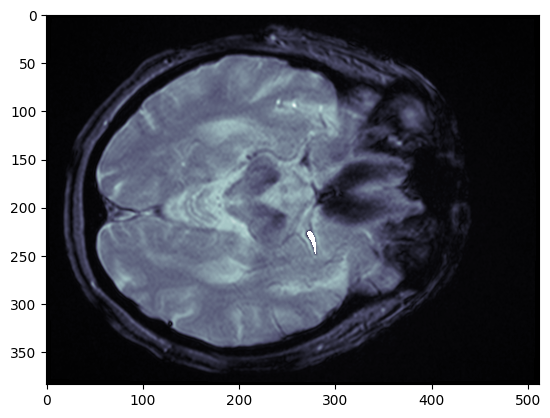

Visualizing slices for patient folder 2018-104_09-10397-D0MR


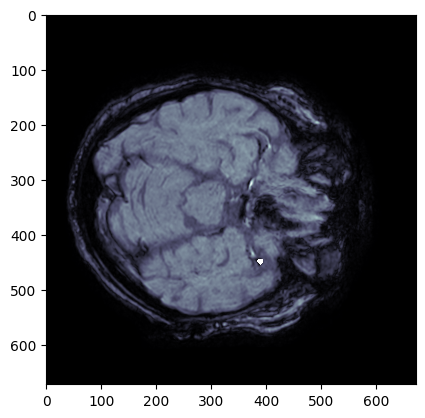

Visualizing slices for patient folder 2018-104_06-10618-D0MR


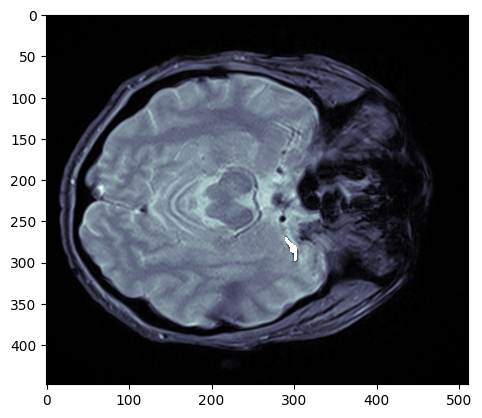

Visualizing slices for patient folder 2018-104_01-10113-D0MR


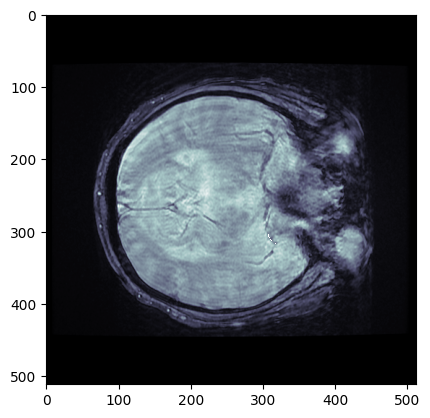

Visualizing slices for patient folder 2018-104_04-10333-D0MR


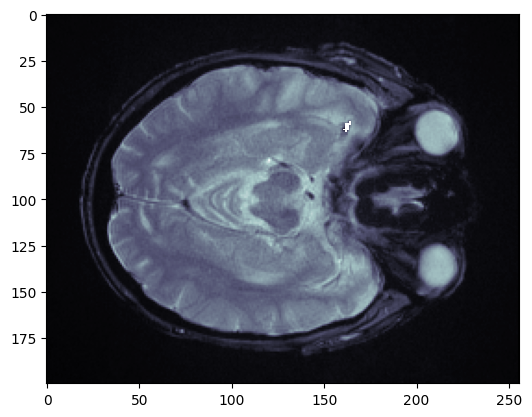

Visualizing slices for patient folder 2018-104_07-10112-D0MR


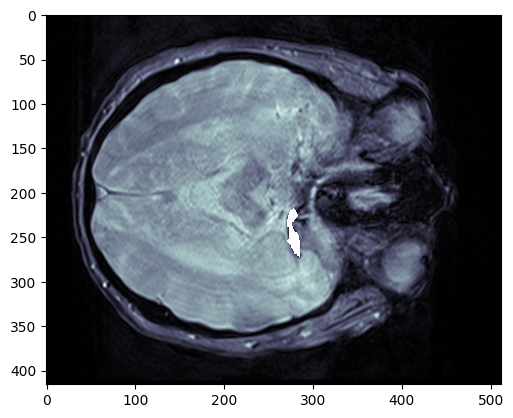

Visualizing slices for patient folder 2018-104_05-10382-D0MR


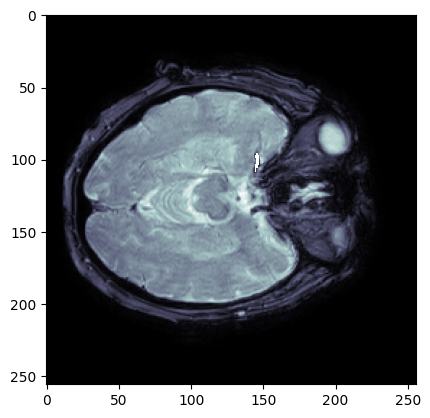

In [80]:
# Base directory containing patient folders
base_directory = 'C:\\Users\\benysar\\Desktop\\Github\\stroke-occlusion\\data\\envoi-20231207'

# List all patient folders
all_folders = [os.path.join(base_directory, d) for d in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, d))]

# Randomly select 7/8 patient folders
selected_folders = random.sample(all_folders, k=random.choice([7, 8]))

# Process each selected folder
for folder in selected_folders:
    modality_path = os.path.join(folder, 'SWI')
    segmentation_path = os.path.join(folder, 'SEG_THROMBMICS')

    if os.path.exists(modality_path) and os.path.exists(segmentation_path):
        mri_files = [f for f in os.listdir(modality_path) if f.endswith('.nii.gz')]
        segmentation_files = [f for f in os.listdir(segmentation_path) if f.endswith('.nii.gz')]

        if mri_files and segmentation_files:
            # Assuming you want to visualize the first file from each
            mri_file_path = os.path.join(modality_path, mri_files[0])
            segmentation_file_path = os.path.join(segmentation_path, segmentation_files[0])

            print(f"Visualizing slices for patient folder {os.path.basename(folder)}")
            plot_mri_with_heatmap(mri_file_path, segmentation_file_path)
        else:
            print(f"No NIfTI files found in {modality_path} or {segmentation_path}")
    else:
        print(f"Modality SWI or segmentation not found in folder {folder}")

## Create i (3D)
